<a href="https://colab.research.google.com/github/shyampagadi/fastai/blob/master/TamilChar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!curl https://course-v3.fast.ai/setup/colab | bash


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   665  100   665    0     0   3275      0 --:--:-- --:--:-- --:--:--  3275
    100% |████████████████████████████████| 5.7MB 7.3MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
    100% |████████████████████████████████| 576.2MB 27kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x632de000 @  0x7fedc61482a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
Cloning into 'course-v3'...
remote: Enumerating objects: 2809, done.
remote: Total 2809 (delta 0), re

In [4]:
# ls

sample_data/


In [0]:
%reload_ext autoreload
%autoreload 
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
import os
import matplotlib.pyplot as plt

import matplotlib.image as mpimg

In [12]:
!pip show fastai

Name: fastai
Version: 1.0.39
Summary: fastai makes deep learning with PyTorch faster, more accurate, and easier
Home-page: https://github.com/fastai/fastai
Author: Jeremy Howard
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: numpy, Pillow, matplotlib, packaging, bottleneck, requests, scipy, numexpr, typing, spacy, pyyaml, dataclasses, nvidia-ml-py3, torchvision, torch, pandas, fastprogress
Required-by: 


In [13]:
!wget http://www.jfn.ac.lk/wp-content/uploads/2016/04/UJTDchar.zip  && unzip -qq UJTDchar.zip -d data_tamil/

--2019-01-11 05:35:31--  http://www.jfn.ac.lk/wp-content/uploads/2016/04/UJTDchar.zip
Resolving www.jfn.ac.lk (www.jfn.ac.lk)... 192.248.56.21
Connecting to www.jfn.ac.lk (www.jfn.ac.lk)|192.248.56.21|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13784829 (13M) [application/zip]
Saving to: ‘UJTDchar.zip’

UJTDchar.zip        100%[===================>]  13.15M  1.93MB/s    in 11s     

2019-01-11 05:35:43 (1.16 MB/s) - ‘UJTDchar.zip’ saved [13784829/13784829]



In [14]:
pwd

'/content'

In [0]:
path = Path("data_tamil/UJTDchar/")


In [0]:
path.ls()


In [0]:
bs = 64

tfms = get_transforms(do_flip=False)

data = (ImageItemList.from_folder(path)
        .random_split_by_pct()
        .label_from_folder()
        .transform(tfms,size=32)
        .databunch())

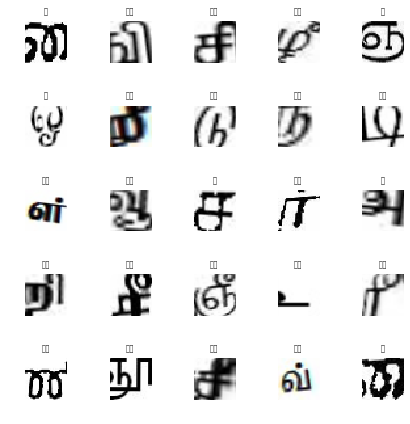

In [33]:
data.show_batch(rows=5, figsize=(6,6))


In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)


In [20]:
learn.fit_one_cycle(20)


epoch,train_loss,valid_loss,error_rate
1,5.161615,4.655143,0.952419
2,4.589064,3.974555,0.853629
3,3.912420,3.285117,0.769758
4,3.456487,2.710579,0.680242
5,3.114913,2.329902,0.616532
6,2.821953,2.002966,0.562097
7,2.518695,1.771698,0.517742
8,2.346605,1.611822,0.464919
9,2.156139,1.459478,0.445968
10,2.009109,1.330976,0.411290


In [0]:
learn1 = create_cnn(data, models.resnet18, metrics=error_rate)


In [40]:
learn1.fit_one_cycle(10)


epoch,train_loss,valid_loss,error_rate
1,5.050056,4.421329,0.915323
2,4.218866,3.507938,0.802823
3,3.623972,2.943366,0.738306
4,3.285343,2.554030,0.666936
5,2.953789,2.287436,0.621371
6,2.727565,2.087898,0.582661
7,2.581264,1.924848,0.543952
8,2.411030,1.845320,0.522984
9,2.363851,1.813893,0.514516
10,2.353762,1.796979,0.511290


In [41]:
learn2 = create_cnn(data, models.resnet50, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 86569712.02it/s]


In [42]:
learn2.fit_one_cycle(10)


epoch,train_loss,valid_loss,error_rate
1,4.890615,4.222559,0.900806
2,4.067413,3.319573,0.795161
3,3.453247,2.661719,0.690726
4,3.002195,2.249780,0.627419
5,2.674265,1.950333,0.564113
6,2.421961,1.713344,0.518952
7,2.219243,1.581707,0.477016
8,2.057996,1.484621,0.458065
9,2.007747,1.434396,0.428226
10,1.942974,1.441660,0.442742


In [0]:
interp = ClassificationInterpretation.from_learner(learn)
# interp1 = ClassificationInterpretation.from_learner(learn1)
# interp2 = ClassificationInterpretation.from_learner(learn2)



In [22]:
interp.most_confused(min_val=7)


[('ன', 'ண', 13),
 ('ணூ', 'னு', 12),
 ('ணி', 'ணீ', 10),
 ('ணூ', 'ணு', 9),
 ('னூ', 'னு', 9),
 ('ப', 'ய', 9)]

In [54]:
interp = ClassificationInterpretation.from_learner(learn)

interp.most_confused(min_val=6)


[('ணி', 'ணீ', 8),
 ('ணீ', 'ணி', 8),
 ('ன', 'ண', 8),
 ('னூ', 'னு', 8),
 ('சு', 'க', 7),
 ('ணூ', 'ணு', 7),
 ('னூ', 'ணூ', 7),
 ('லூ', 'லு', 7),
 ('ளி', 'ளீ', 7)]

In [48]:
interp1.most_confused(min_val=7)


[('ணி', 'ணீ', 11),
 ('டூ', 'டு', 10),
 ('ணூ', 'ணு', 10),
 ('ன', 'ண', 10),
 ('ஞி', 'ஞீ', 8),
 ('னூ', 'ணூ', 8)]

In [49]:
interp2.most_confused(min_val=7)


[('ணூ', 'ணு', 12),
 ('ஓ', 'ஒ', 11),
 ('லூ', 'லு', 11),
 ('சு', 'க', 9),
 ('ணி', 'ணீ', 9),
 ('ன', 'ண', 9),
 ('று', 'றூ', 9),
 ('ச', 'க', 8),
 ('ல்', 'வ்', 8),
 ('வீ', 'லீ', 8)]

In [50]:
learn.lr_find()


epoch,train_loss,valid_loss,error_rate


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


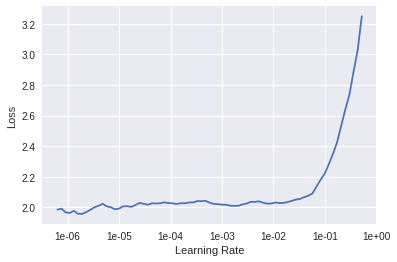

In [51]:
learn.recorder.plot()


In [23]:
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-3))


epoch,train_loss,valid_loss,error_rate
1,1.453218,0.931448,0.290323
2,1.464600,0.924112,0.295968
3,1.471036,0.921937,0.294758
4,1.451248,0.907334,0.288710
5,1.440550,0.909502,0.292742
6,1.478362,0.900380,0.292339
7,1.429569,0.900046,0.287097
8,1.389312,0.876026,0.281452
9,1.368363,0.888276,0.284274
10,1.385348,0.883871,0.284677


In [0]:
learn.unfreeze()


epoch,train_loss,valid_loss,error_rate


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


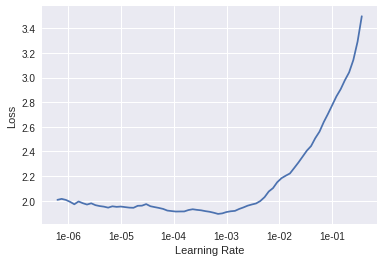

In [56]:
learn.lr_find()
learn.recorder.plot()


In [25]:
learn.fit_one_cycle(20, max_lr=slice(1e-6,1e-4))


epoch,train_loss,valid_loss,error_rate
1,1.359349,0.872376,0.280645
2,1.331598,0.864304,0.272581
3,1.334399,0.843112,0.274194
4,1.289960,0.808161,0.254032
5,1.259184,0.760671,0.242742
6,1.210884,0.726754,0.235887
7,1.149012,0.705938,0.229435
8,1.141096,0.677554,0.218145
9,1.089823,0.652167,0.210887
10,1.051004,0.630465,0.208065


In [26]:
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-4))


epoch,train_loss,valid_loss,error_rate
1,0.934947,0.560729,0.186694
2,0.945061,0.570229,0.187097
3,0.886350,0.549593,0.186694
4,0.873843,0.534081,0.181048
5,0.890537,0.514606,0.179032
6,0.868268,0.511551,0.176210
7,0.823566,0.508024,0.177016
8,0.798203,0.498044,0.173387
9,0.820269,0.512798,0.173387
10,0.829651,0.509253,0.175806


In [27]:
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-4))


epoch,train_loss,valid_loss,error_rate
1,0.832711,0.500628,0.167742
2,0.818182,0.493620,0.171371
3,0.821090,0.484388,0.166532
4,0.795152,0.479186,0.163710
5,0.770198,0.489078,0.170161
6,0.778283,0.462451,0.166532
7,0.764830,0.449926,0.159677
8,0.726306,0.446824,0.158065
9,0.737291,0.454182,0.159677
10,0.758379,0.444904,0.154435


In [28]:
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-4))


epoch,train_loss,valid_loss,error_rate
1,0.724900,0.445703,0.161694
2,0.743114,0.442317,0.157661
3,0.725578,0.440042,0.150806
4,0.751806,0.429576,0.155242
5,0.706180,0.440388,0.156048
6,0.683823,0.417646,0.151613
7,0.676574,0.407489,0.149194
8,0.694142,0.417346,0.149597
9,0.677310,0.422604,0.144758
10,0.685183,0.412695,0.146371


In [29]:
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-4))


epoch,train_loss,valid_loss,error_rate
1,0.677901,0.405892,0.143145
2,0.674445,0.409667,0.149194
3,0.670505,0.400655,0.136694
4,0.657202,0.404602,0.145968
5,0.642167,0.392161,0.140726
6,0.628095,0.387555,0.134274
7,0.635053,0.381124,0.135887
8,0.625795,0.380629,0.142339
9,0.615483,0.382094,0.143145
10,0.623411,0.382974,0.142742


In [30]:
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-4))


epoch,train_loss,valid_loss,error_rate
1,0.614695,0.384235,0.138306
2,0.626228,0.400169,0.141532
3,0.608501,0.377684,0.132258
4,0.617692,0.382222,0.137097
5,0.610812,0.369686,0.130242
6,0.586773,0.359422,0.128629
7,0.587970,0.352535,0.124194
8,0.580206,0.362878,0.129839
9,0.567712,0.361866,0.127823
10,0.590830,0.357432,0.125000


In [31]:
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-4))


epoch,train_loss,valid_loss,error_rate
1,0.564858,0.352834,0.125403
2,0.578128,0.353374,0.127823
3,0.580453,0.362502,0.131452
4,0.582047,0.350588,0.128226
5,0.576151,0.352339,0.126210
6,0.553395,0.335535,0.121371
7,0.539481,0.338247,0.123387
8,0.537185,0.335409,0.121371
9,0.558858,0.337784,0.123387
10,0.544044,0.336509,0.121774


In [32]:
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-4))


epoch,train_loss,valid_loss,error_rate
1,0.544624,0.332303,0.122581
2,0.551355,0.330528,0.119758
3,0.545784,0.340690,0.123790
4,0.548746,0.353809,0.132661
5,0.546866,0.327028,0.122177
6,0.533087,0.334419,0.124194
7,0.527066,0.333981,0.124597
8,0.508359,0.322388,0.121371
9,0.518765,0.322574,0.121774
10,0.518262,0.321248,0.117742


In [33]:
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-4))


epoch,train_loss,valid_loss,error_rate
1,0.511512,0.322867,0.121774
2,0.515479,0.319719,0.122177
3,0.511797,0.325853,0.123387
4,0.506297,0.323242,0.116129
5,0.528809,0.322545,0.115323
6,0.495206,0.322759,0.115726
7,0.491529,0.319389,0.123387
8,0.494980,0.328322,0.123790
9,0.487183,0.320324,0.120565
10,0.475456,0.310815,0.116532


In [34]:
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-4))


epoch,train_loss,valid_loss,error_rate
1,0.484868,0.326900,0.121774
2,0.474733,0.317945,0.120565
3,0.489337,0.316081,0.118548
4,0.507071,0.308575,0.118952
5,0.477215,0.313354,0.118548
6,0.500569,0.310097,0.112500
7,0.471501,0.299690,0.112903
8,0.461486,0.304802,0.119758
9,0.450170,0.305007,0.117339
10,0.447379,0.300014,0.112903


In [35]:
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-4))


epoch,train_loss,valid_loss,error_rate
1,0.447232,0.296899,0.110081
2,0.456767,0.307013,0.117339
3,0.462643,0.298034,0.115726
4,0.456478,0.295791,0.113710
5,0.476035,0.294816,0.114516
6,0.445997,0.305940,0.114113
7,0.440201,0.298044,0.116532
8,0.433854,0.296150,0.112500
9,0.439275,0.290504,0.112500
10,0.432122,0.296607,0.117742


In [36]:
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-4))


epoch,train_loss,valid_loss,error_rate
1,0.448016,0.305691,0.115323
2,0.435944,0.302144,0.116129
3,0.441144,0.296270,0.119355
4,0.451244,0.300726,0.118145
5,0.460523,0.299343,0.121774
6,0.435072,0.307556,0.123387
7,0.439189,0.295640,0.115323
8,0.421499,0.291870,0.112500
9,0.419138,0.295316,0.114113
10,0.409973,0.298082,0.115726


In [37]:
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-4))


epoch,train_loss,valid_loss,error_rate
1,0.430609,0.300358,0.117339
2,0.421707,0.299224,0.116532
3,0.424202,0.290908,0.113306
4,0.418592,0.301273,0.118548
5,0.427190,0.295504,0.118145
6,0.412434,0.303648,0.118952
7,0.411372,0.290878,0.122177
8,0.403699,0.285810,0.119355
9,0.400160,0.289247,0.114113
10,0.398836,0.287260,0.114516


In [0]:
filename = 'data_tamil/UJTDchar/test_data/Ta(1).jpg'


In [49]:
img = open_image(filename)
losses = learn.predict(img)
prediction = losses[0];
prediction

Category ஊ

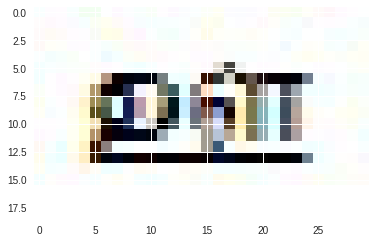

In [50]:
img=mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

In [0]:
filename1 = 'data_tamil/UJTDchar/test_data/Ta(21).jpg'


In [80]:
img = open_image(filename1)
losses = learn.predict(img)
prediction = losses[0];
prediction

Category ஙீ

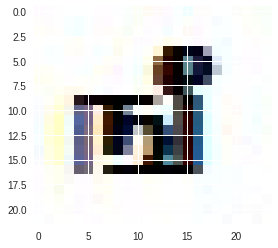

In [81]:
img=mpimg.imread(filename1)
imgplot = plt.imshow(img)
plt.show()

In [0]:
interp = ClassificationInterpretation.from_learner(learn)


In [69]:
interp.most_confused(min_val=2)


[('ன', 'ண', 13),
 ('ணி', 'ணீ', 10),
 ('ணூ', 'னு', 10),
 ('ணூ', 'ணு', 9),
 ('லூ', 'லு', 9),
 ('னூ', 'னு', 8),
 ('னூ', 'ணூ', 7),
 ('ணீ', 'ணி', 6),
 ('ளு', 'ளூ', 6),
 ('ளூ', 'ளு', 6),
 ('நூ', 'ஞூ', 5),
 ('ப', 'ய', 5),
 ('ஒ', 'ஓ', 4),
 ('ஙீ', 'ஙி', 4),
 ('ணு', 'ணூ', 4),
 ('து', 'தூ', 4),
 ('நு', 'நூ', 4),
 ('ழ', 'ழ்', 4),
 ('ழு', 'ழூ', 4),
 ('ஞூ', 'ஞு', 3),
 ('ண', 'ை', 3),
 ('ன', 'ை', 3),
 ('னீ', 'னி', 3),
 ('மி', 'யி', 3),
 ('ற', 'ற்', 3),
 ('று', 'றூ', 3),
 ('ள்', 'ன்', 3)]